In [1]:
import sys,os,csv,math
from collections import Counter,OrderedDict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import pandas as pd
from scipy.stats import norm

In [2]:
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

In [3]:
def fdict(counts, threshold):
  fcounts = {'others': 0}
  for mwclass in counts:
    if counts[mwclass]>threshold:
      fcounts[mwclass] = counts[mwclass]
    else:
      fcounts['others'] += counts[mwclass] 
  return fcounts

In [4]:
filename = 'AVlabels/AV-AVclass.csv'

In [5]:
classes = []

In [6]:
# Read malware classes from a csv file (malware_hash,malware_class)
# Create a malware count dictionary (class: number_of_samples)
with open(filename, 'r') as csvfile:
    content = csv.reader(csvfile, delimiter=',')
    for row in content:
        classes.append(row[1])
counts = Counter(classes)
counts = OrderedDict(sorted(counts.items(), key=lambda t: t[0]))

In [7]:
# Sort malware count dictionary by number of samples
ordcounts = OrderedDict(sorted(counts.items(), key=lambda t: t[1]))
print ordcounts
print("Number of classes: %d" %(len(counts.keys()))) 

OrderedDict([('aaxv', 1), ('adclicer', 1), ('adspy', 1), ('ainslot', 1), ('akmz', 1), ('amgfx', 1), ('antavmu', 1), ('antivirus', 1), ('archsms', 1), ('asylum', 1), ('atraps', 1), ('aura', 1), ('autoruner', 1), ('autotroj', 1), ('ayqs', 1), ('aywm', 1), ('banz', 1), ('barys', 1), ('beci', 1), ('beizhu', 1), ('bhxu', 1), ('binder', 1), ('bindex', 1), ('bizload', 1), ('bkclient', 1), ('bluedit', 1), ('bluescreen', 1), ('bodor', 1), ('boht', 1), ('boopcel', 1), ('borg', 1), ('boyq', 1), ('bublik', 1), ('bundlore', 1), ('buterat', 1), ('buttman', 1), ('bzub', 1), ('cakl', 1), ('cekar', 1), ('chifrax', 1), ('chiton', 1), ('chupik', 1), ('cicevre', 1), ('cinmus', 1), ('cloud', 1), ('coced', 1), ('coidung', 1), ('constructor', 1), ('cpex', 1), ('cqbc', 1), ('cridex', 1), ('cryptredol', 1), ('curioso', 1), ('daemonize', 1), ('darker', 1), ('daum', 1), ('dcbd', 1), ('demp', 1), ('dibik', 1), ('disfa', 1), ('dnguard', 1), ('dofoil', 1), ('dogrobot', 1), ('dollarrevenue', 1), ('dorifel', 1), ('dr

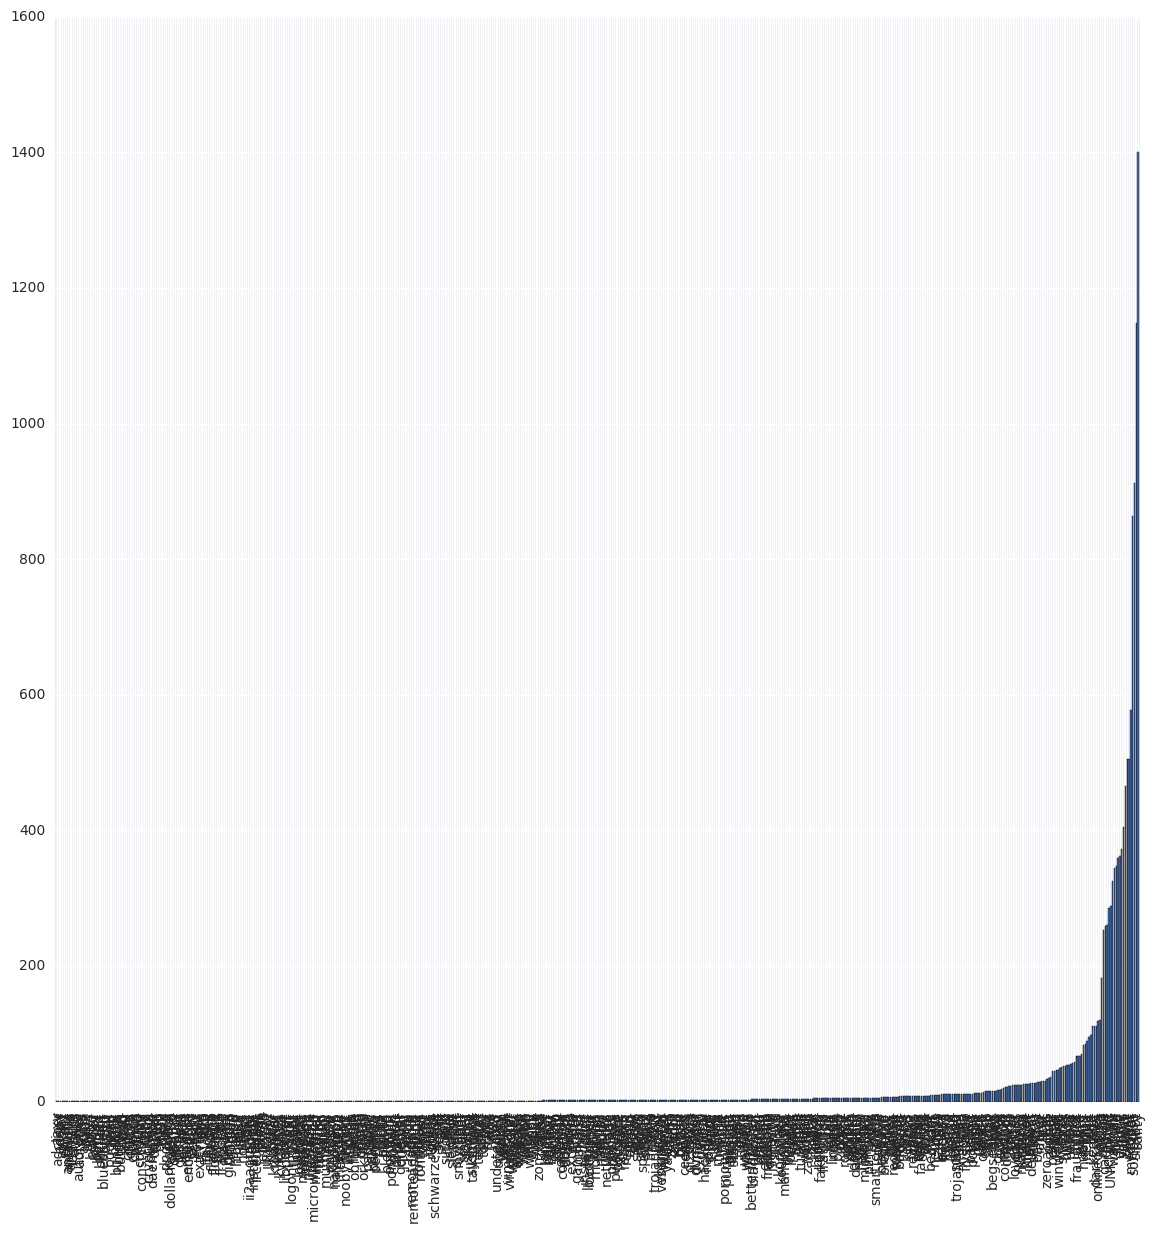

In [8]:
# Plot malware distribution bar chart ordered by number of samples 
figure = plt.gcf()
figure.set_size_inches(14, 14)
plt.xlim([-1,len(ordcounts)])
plt.bar(range(len(ordcounts)), ordcounts.values(), align='center')
plt.xticks(range(len(ordcounts)), ordcounts.keys(), rotation='vertical')
plt.show()

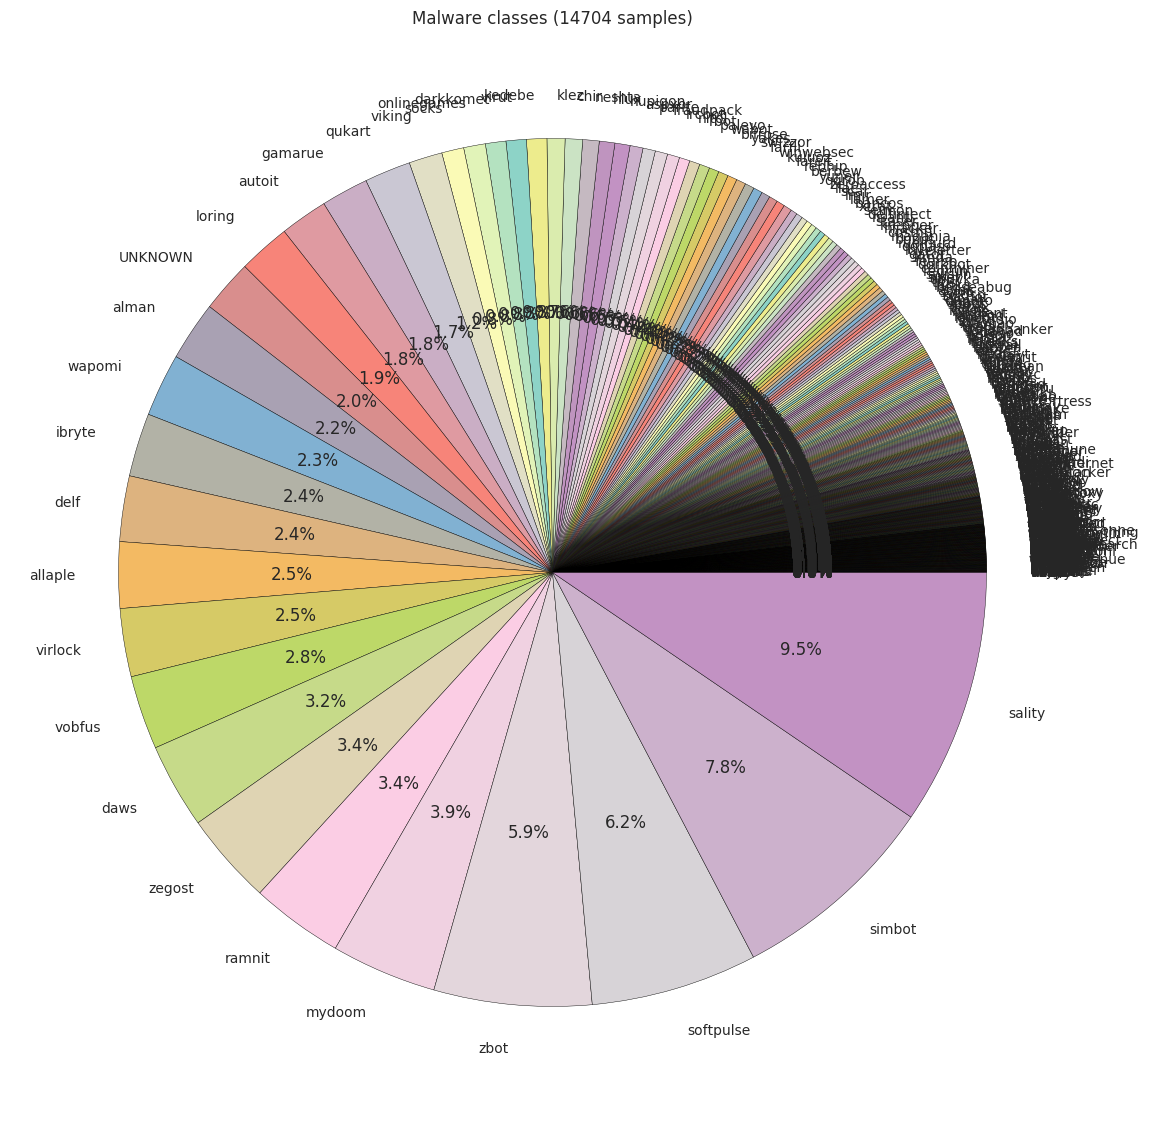

In [9]:
# Plot malware distribution pie chart ordered by number of samples
figure = plt.gcf()
figure.set_size_inches(14, 14)
cs=cm.Set3(np.arange(30)/30.)
plt.axis("equal")
plt.pie(ordcounts.values(),labels=ordcounts.keys(),autopct="%1.1f%%", colors=cs)
plt.title("Malware classes (%d samples)" %sum(ordcounts.itervalues()))
plt.show()

In [10]:
threshold = math.floor(len(classes)*0.01)
fcounts = fdict(counts,threshold)
fordcounts = OrderedDict(sorted(fcounts.items(), key=lambda t: t[1]))
if 'UNKNOWN' in fordcounts:
    del fordcounts['UNKNOWN']
if 'others' in fordcounts:
    del fordcounts['others']
print fordcounts
print("Number of classes: %d (threshold: %d)" %(len(fordcounts.keys()),threshold))

OrderedDict([('viking', 183), ('qukart', 253), ('gamarue', 259), ('autoit', 261), ('loring', 285), ('alman', 325), ('wapomi', 345), ('ibryte', 347), ('delf', 359), ('allaple', 362), ('virlock', 373), ('vobfus', 405), ('daws', 466), ('zegost', 505), ('ramnit', 506), ('mydoom', 578), ('zbot', 863), ('softpulse', 912), ('simbot', 1148), ('sality', 1401)])
Number of classes: 20 (threshold: 147)


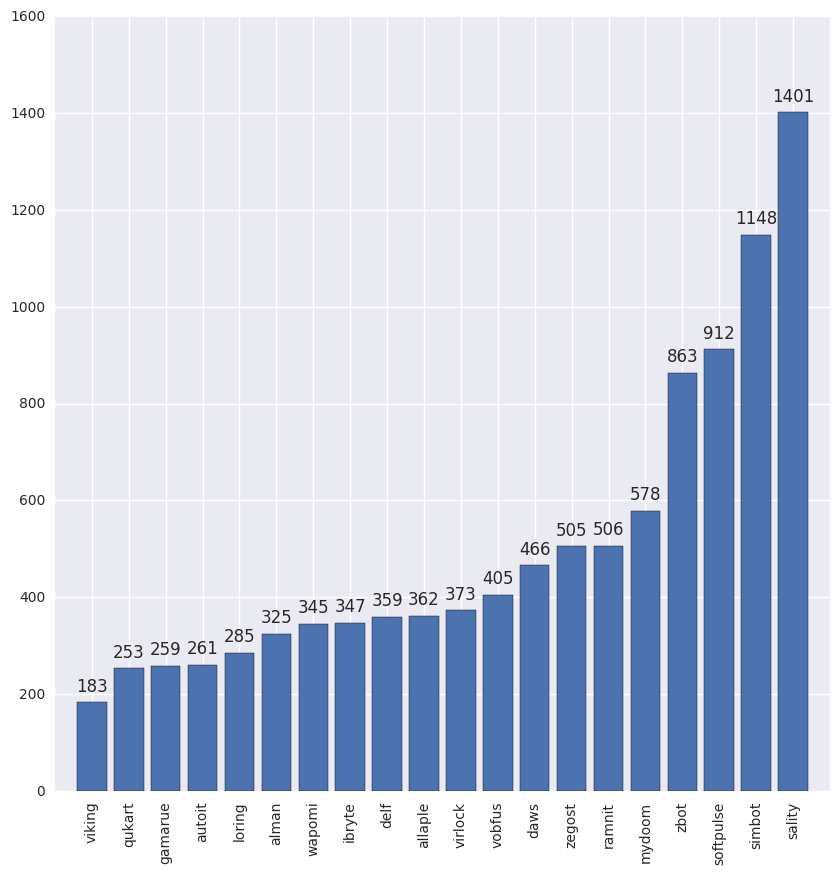

In [11]:
# Plot malware distribution bar chart ordered by number of samples
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.xlim([-1,len(fordcounts)])
rects = ax.bar(range(len(fordcounts)), fordcounts.values(), align='center')
plt.xticks(range(len(fordcounts)), fordcounts.keys(), rotation='vertical')
autolabel(rects, ax)
plt.show()

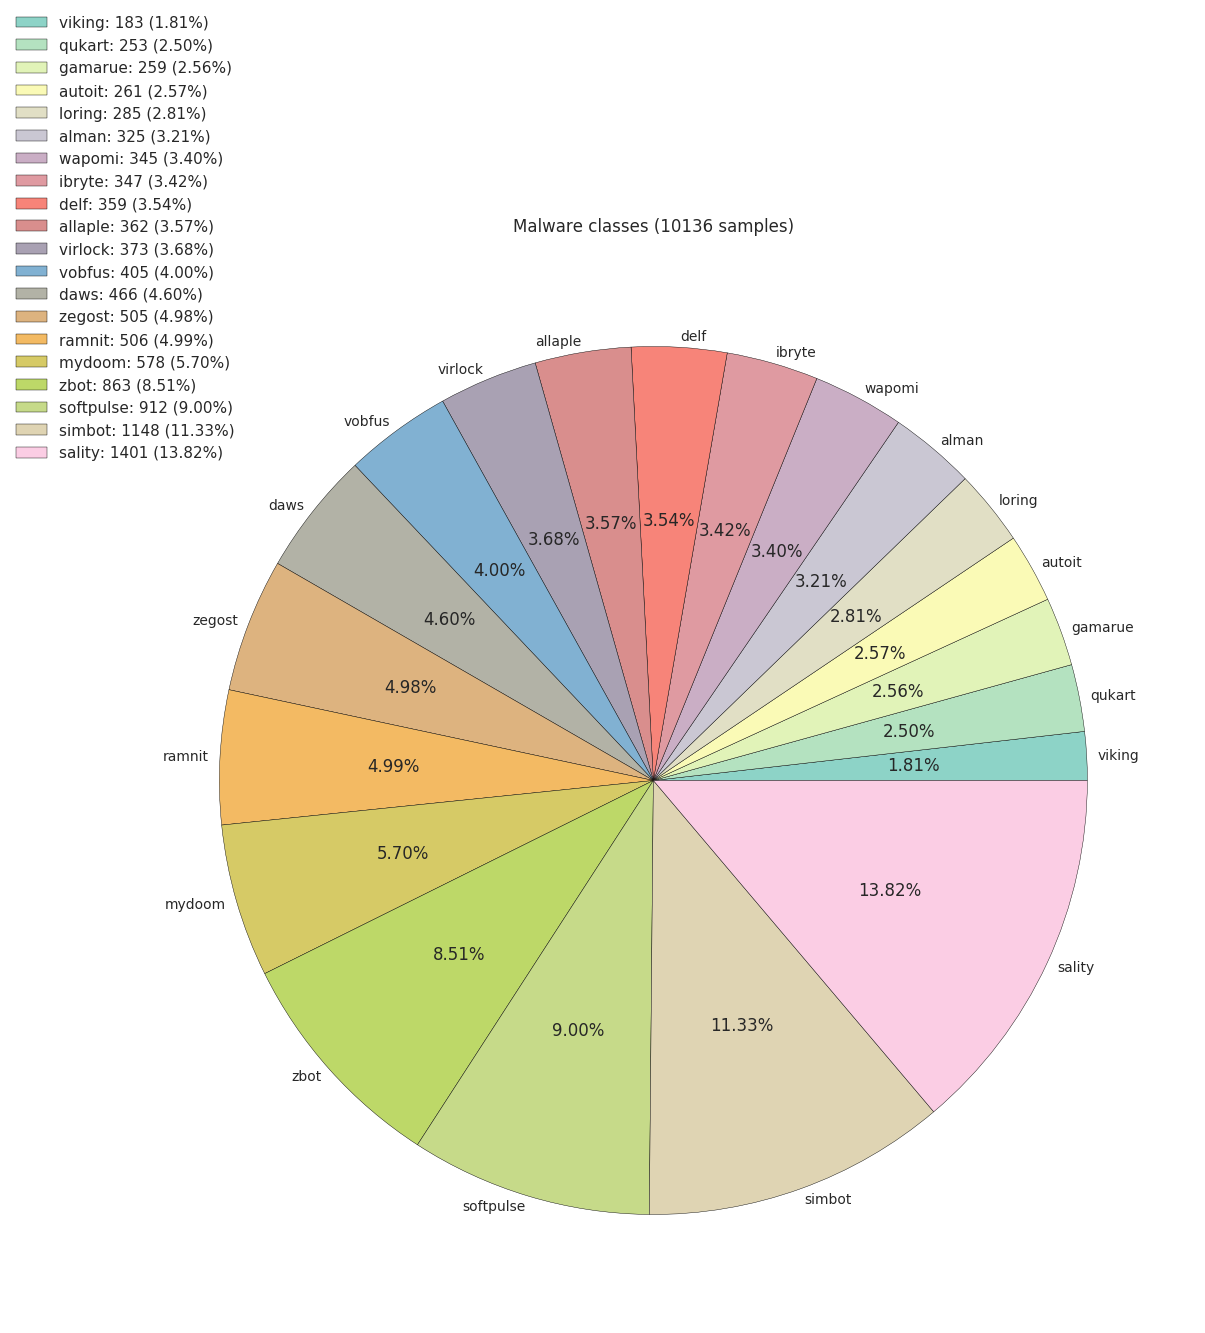

In [12]:
# Plot malware distribution pie chart ordered by number of samples
figure = plt.gcf()
figure.set_size_inches(14, 14)
cs=cm.Set3(np.arange(30)/30.)
x = np.char.array(fordcounts.keys())
y = np.array(fordcounts.values())
porcent = 100.*y/y.sum()
patches, texts, autopcts = plt.pie(y,labels=x,autopct="%.2f%%", colors=cs, labeldistance=1.025)
labels = ['{0}: {1} ({2:1.2f}%)'.format(i,j,k) for i,j,k in zip(x, y, porcent)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),fontsize=11)
plt.title("Malware classes (%d samples)" %sum(fordcounts.itervalues()))
plt.show()